In [115]:
import os
import numpy
from scipy.interpolate import interp1d

root = 'logs/'
algos = ['a2c', 'acktr', 'ppo']
games = ['beamrider', 'breakout', 'qbert']
numTrials = 5

def getLogFileNames(trialName):
    folderPath = root + trialName
    logFileNames = [fileName for fileName in os.listdir(folderPath) if 'monitor' in fileName]
    return folderPath, logFileNames
    
def getTrialStats(trialName):
    folderPath, logFileNames = getLogFileNames(trialName)
    
    logs = []
    for fileName in logFileNames:
        filePath = folderPath + '/' + fileName
        log_lines = []
        with open(filePath, 'r') as log_file:
            log_lines = log_file.readlines()
        logs.append(log_lines[2:])

    numProcesses = len(logs)
    timeSteps = []
    rewards = []
    for log in logs:
        curTimeStep = 0
        for line in log:
            lineParts = line.split(',')
            episodeReward = float(lineParts[0])
            episodeSteps = int(lineParts[1])
            episodeTime = float(lineParts[2])
            curTimeStep += episodeSteps * numProcesses
            timeSteps.append(curTimeStep)
            rewards.append(episodeReward)

    return timeSteps, rewards

def standardize_times(times):
    startTime = times[0]
    endTime = times[-1]
    numTimes = len(times)
    return numpy.linspace(startTime, endTime, numTimes)

def standardize_rewards(standardTimes, times, rewards):
    #retRewards = numpy.interp(standardTimes, times, rewards)
    #print(retRewards[5])
    #print(numpy.interp(standardTimes[5], times[3:8], rewards[3:8]))
    #return retRewards
    print(times[-1])
    print(standardTimes[-1])
    f = interp1d(times, rewards, kind='nearest')
    print(rewards[-1])
    print(f(standardTimes[-1]))
    print(f(standardTimes)[-1])
    return f(standardTimes)
    

In [116]:
trialNames = []
for algo in algos:
    for game in games:
        for trialNum in range(1, numTrials + 1):
            trialStr = str(trialNum)
            trialName = algo + '_' + game + '_' + trialStr
            trialNames.append(trialName)

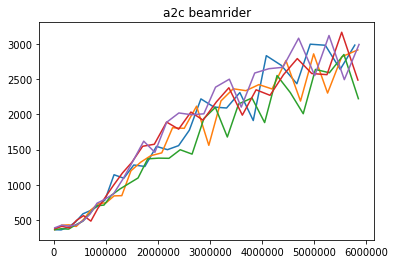

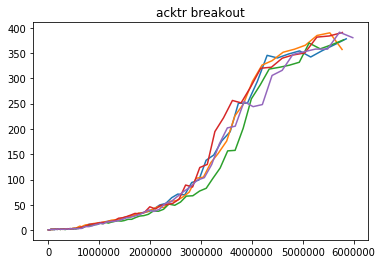

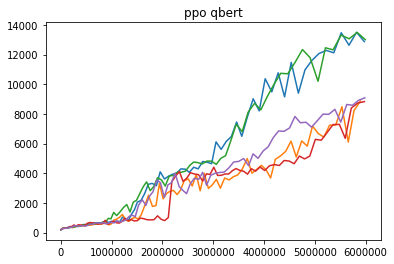

In [119]:
import matplotlib.pyplot as plt

def running_mean(x, N):
    cumsum = numpy.cumsum(numpy.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

for i, algo in enumerate(algos):
    game = games[i]
    
    plt.figure(i)    
    plt.title(algo + ' ' + game)
    
    for trialNum in range(1, numTrials + 1):
        trialNumStr = str(trialNum)
        trialName = algo + '_' + game + '_' + trialNumStr
        times, rewards = getTrialStats(trialName)
        times, rewards = zip(*sorted(zip(times, rewards)))
        rewardsWindow = running_mean(numpy.array(rewards), 50)
        plt.plot(numpy.array(times[:-49:100]), numpy.array(rewardsWindow[::100]))
        
plt.show()